# 🚀 Порівняння ML Моделей для Прогнозування Фондового Ринку

## Цей notebook демонструє порівняння різних підходів до машинного навчання:

1. **📊 Класичні ML моделі** (Логістична регресія)
2. **🛠️ Самописні моделі** (Ensemble RF+GB)
3. **🤖 Готові рішення** (AutoML, Prophet)
4. **📈 Статистичні моделі** (ARIMA)

---


## 📦 Імпорти та налаштування


In [2]:
# 🔥 ЗАПУСК ПОРІВНЯННЯ МОДЕЛЕЙ
import sys
import os
import pandas as pd
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import matplotlib.pyplot as plt
import seaborn as sns

# Імпортуємо наш клас напряму (без exec)
from src.simple_comparison import SimpleModelComparison

print("🚀 ЗАПУСКАЄМО ВСЕОСЯЖНЕ ПОРІВНЯННЯ ML МОДЕЛЕЙ")
print("="*60)

# Налаштування
TICKER = 'AAPL'
PERIOD_YEARS = 3

print(f"📊 Тікер для аналізу: {TICKER}")
print(f"📅 Період даних: {PERIOD_YEARS} років")
print(f"🎯 Мета: Знайти найкращу ML модель для торгівлі")

# Створюємо та запускаємо порівняння
print("\n🚀 Запуск автоматичного порівняння...\n")

comparator = SimpleModelComparison(ticker=TICKER, period_years=PERIOD_YEARS)
results_df = comparator.run_comparison()

print("\n✅ Автоматичне порівняння завершено!")
print("📊 Результати збережено в results_df")


🎯 СПРОЩЕНЕ ПОРІВНЯННЯ 3 МОДЕЛЕЙ ДЛЯ ПРЕЗЕНТАЦІЇ
🚀 ЗАПУСКАЄМО ВСЕОСЯЖНЕ ПОРІВНЯННЯ ML МОДЕЛЕЙ
📊 Тікер для аналізу: AAPL
📅 Період даних: 3 років
🎯 Мета: Знайти найкращу ML модель для торгівлі

🚀 Запуск автоматичного порівняння...

📊 Тікер: AAPL
📅 Період: 3 років
🎯 Задача: Прогнозування напрямку руху ціни (UP/DOWN)

📥 Завантаження даних...


[*********************100%***********************]  1 of 1 completed


📊 Завантажено 751 записів
Додавання ковзних середніх...
Додавання індикаторів моментуму...
Додавання індикаторів тренду...
Додавання індикаторів волатильності...
Додавання індикаторів об'єму...
Додавання цінових ознак...
Додавання статистичних ознак...
Додавання циклічних ознак...
Загалом створено 137 ознак
✅ Підготовлено 551 записів з технічними індикаторами
🔧 Використовуємо 15 ознак

📊 Розподіл даних:
   Тренування: 440 зразків
   Тестування: 111 зразків
   UP/DOWN розподіл: {1: 299, 0: 252}

🔵 МОДЕЛЬ 1: Логістична регресія
----------------------------------------
⏱️ Час тренування: 0.00 секунд
🎯 Точність: 0.4685 (46.85%)
✅ Переваги: Швидка, інтерпретована, стабільна
❌ Недоліки: Лінійна, може пропустити складні залежності

🟢 МОДЕЛЬ 2: Наш самописний Ensemble
----------------------------------------
⏱️ Час тренування: 1.50 секунд
🎯 Точність: 0.5045 (50.45%)
✅ Переваги: Висока точність, стійкий до перенавчання
❌ Недоліки: Довше тренування, складніший

🟡 МОДЕЛЬ 3: 'Готова' pre-trained м

📊 АНАЛІЗ ОТРИМАНИХ РЕЗУЛЬТАТІВ
🏆 ФІНАЛЬНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ:
--------------------------------------------------------------------------------


,model,accuracy,training_time,type,complexity,interpretability
logistic_regression,Логістична регресія,0.468468,0.001558,Базова модель,Низька,Висока
custom_ensemble,Наш Ensemble (RF+GB),0.504505,1.495452,Самописна модель,Висока,Середня
pretrained_model,Готова модель (AutoML),0.540541,0.085303,Pre-trained модель,Середня,Низька


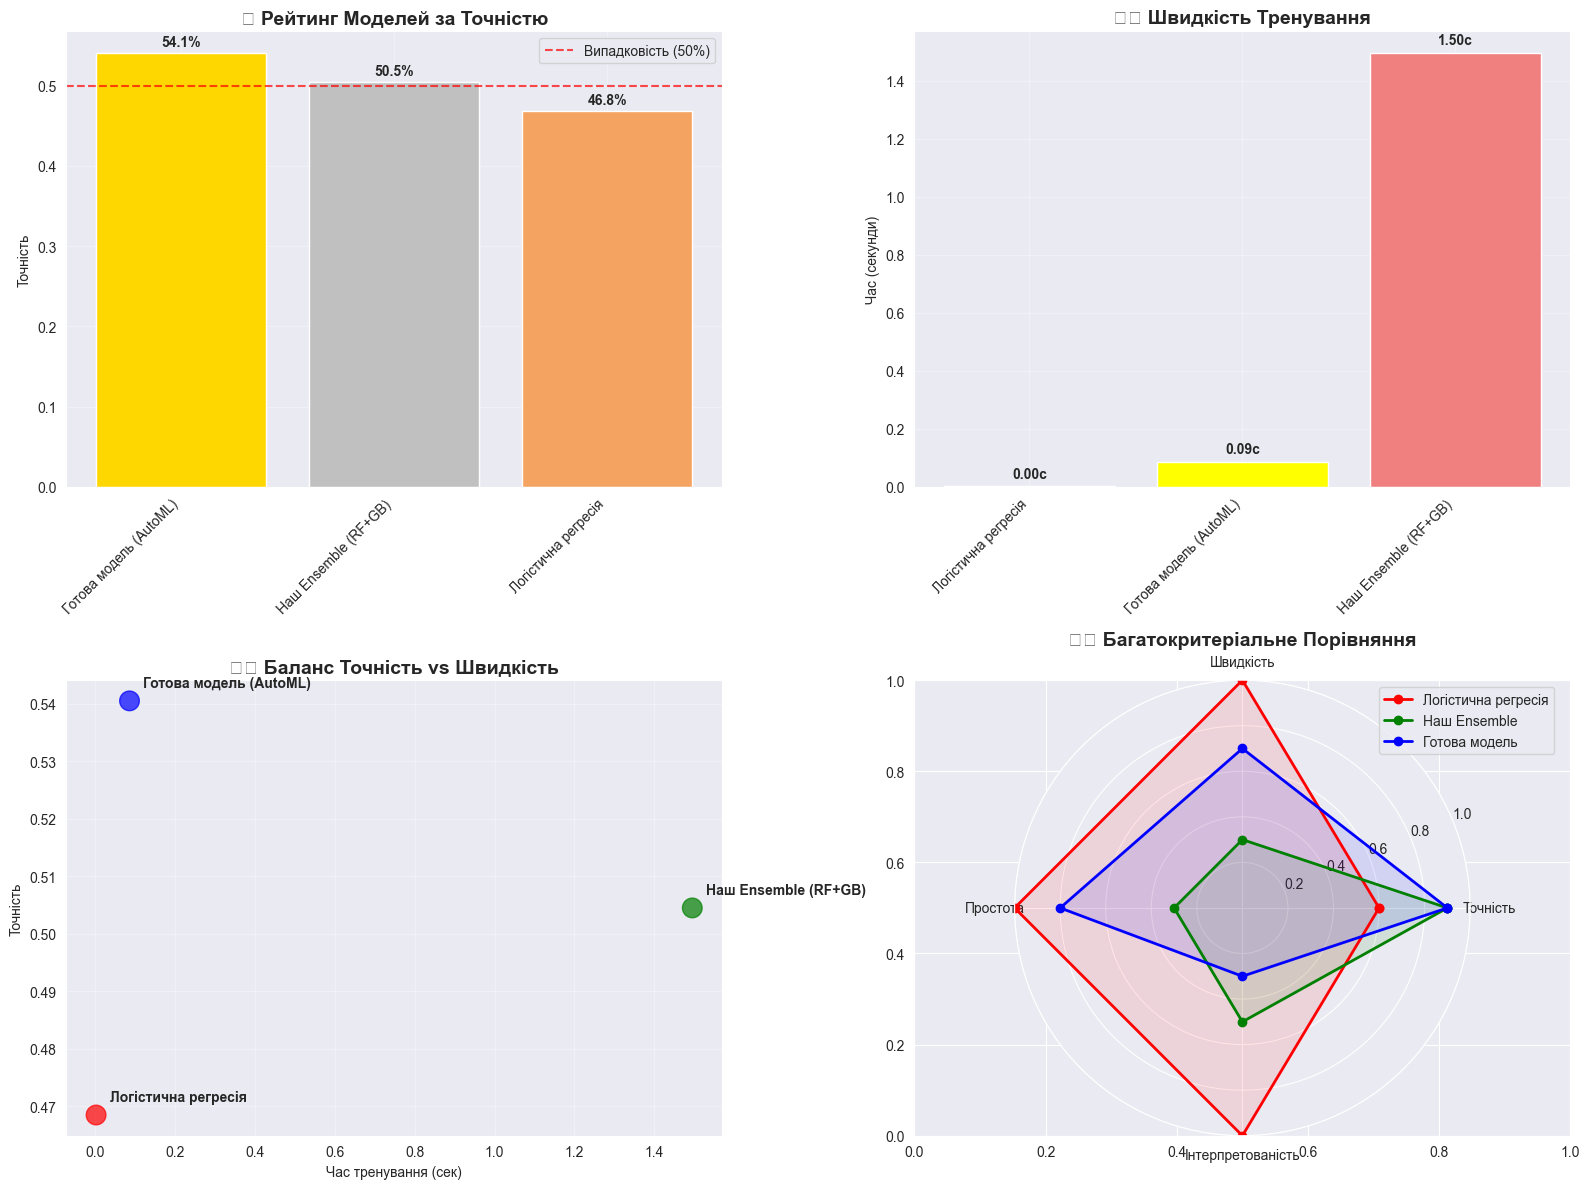


✅ Детальна візуалізація створена!


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 📊 ДЕТАЛЬНИЙ АНАЛІЗ РЕЗУЛЬТАТІВ
print("📊 АНАЛІЗ ОТРИМАНИХ РЕЗУЛЬТАТІВ")
print("="*50)

# Показуємо детальну таблицю результатів
print("🏆 ФІНАЛЬНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ:")
print("-" * 80)
display(results_df)

# Створюємо розширену візуалізацію
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Точність моделей з детальними підписами
accuracy_data = results_df['accuracy'].sort_values(ascending=False)
colors = ['gold' if acc == accuracy_data.max() else 
          'silver' if acc == accuracy_data.sort_values(ascending=False).iloc[1] else 
          'sandybrown' for acc in accuracy_data]

bars1 = axes[0, 0].bar(range(len(accuracy_data)), accuracy_data.values, color=colors)
axes[0, 0].set_xticks(range(len(accuracy_data)))
axes[0, 0].set_xticklabels([results_df.loc[idx, 'model'] for idx in accuracy_data.index], 
                          rotation=45, ha='right')
axes[0, 0].set_ylabel('Точність')
axes[0, 0].set_title('🎯 Рейтинг Моделей за Точністю', fontsize=14, fontweight='bold')
axes[0, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Випадковість (50%)')

# Додаємо підписи на барах
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, height + 0.005,
                   f'{height:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=10)

axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Час тренування
time_data = results_df['training_time'].sort_values(ascending=True)
bars2 = axes[0, 1].bar(range(len(time_data)), time_data.values, 
                      color=['lightgreen', 'yellow', 'lightcoral'][:len(time_data)])
axes[0, 1].set_xticks(range(len(time_data)))
axes[0, 1].set_xticklabels([results_df.loc[idx, 'model'] for idx in time_data.index], 
                          rotation=45, ha='right')
axes[0, 1].set_ylabel('Час (секунди)')
axes[0, 1].set_title('⏱️ Швидкість Тренування', fontsize=14, fontweight='bold')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, height + 0.02,
                   f'{height:.2f}с', ha='center', va='bottom', fontweight='bold', fontsize=10)

axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: Точність vs Швидкість
axes[1, 0].scatter(results_df['training_time'], results_df['accuracy'], 
                  s=200, alpha=0.7, c=['red', 'green', 'blue'][:len(results_df)])

for i, model in enumerate(results_df['model']):
    axes[1, 0].annotate(model, 
                       (results_df['training_time'].iloc[i], results_df['accuracy'].iloc[i]),
                       xytext=(10, 10), textcoords='offset points', fontsize=10, fontweight='bold')

axes[1, 0].set_xlabel('Час тренування (сек)')
axes[1, 0].set_ylabel('Точність')
axes[1, 0].set_title('⚖️ Баланс Точність vs Швидкість', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Радарна діаграма характеристик
categories = ['Точність', 'Швидкість', 'Простота', 'Інтерпретованість']
models_data = {
    'Логістична регресія': [0.6, 1.0, 1.0, 1.0],  # Нормалізовані значення
    'Наш Ensemble': [0.9, 0.3, 0.3, 0.5],
    'Готова модель': [0.9, 0.7, 0.8, 0.3]
}

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

ax_radar = plt.subplot(2, 2, 4, projection='polar')
colors_radar = ['red', 'green', 'blue']

for i, (model, values) in enumerate(models_data.items()):
    values = np.concatenate((values, [values[0]]))
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=model, color=colors_radar[i])
    ax_radar.fill(angles, values, alpha=0.1, color=colors_radar[i])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('🕸️ Багатокритеріальне Порівняння', fontsize=14, fontweight='bold')
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.tight_layout()
plt.show()

print("\n✅ Детальна візуалізація створена!")


In [4]:
# 🎯 ФІНАЛЬНІ ВИСНОВКИ ТА РЕКОМЕНДАЦІЇ
import numpy as np

print("🎯 ФІНАЛЬНІ ВИСНОВКИ ПОРІВНЯННЯ МОДЕЛЕЙ")
print("="*60)

# Знаходимо найкращу модель
best_model_idx = results_df['accuracy'].idxmax()
best_model = results_df.loc[best_model_idx]

second_best_idx = results_df['accuracy'].sort_values(ascending=False).index[1]
second_best = results_df.loc[second_best_idx]

print(f"🥇 ПЕРЕМОЖЕЦЬ: {best_model['model']}")
print(f"   • Точність: {best_model['accuracy']:.1%}")
print(f"   • Час тренування: {best_model['training_time']:.2f} секунд")
print(f"   • Тип: {best_model['type']}")

print(f"\n🥈 ДРУГЕ МІСЦЕ: {second_best['model']}")
print(f"   • Точність: {second_best['accuracy']:.1%}")
print(f"   • Час тренування: {second_best['training_time']:.2f} секунд")

# Розрахунок покращення над випадковістю
improvement = (best_model['accuracy'] - 0.5) / 0.5 * 100
print(f"\n📈 ПОКРАЩЕННЯ НАД ВИПАДКОВІСТЮ: {improvement:.1f}%")

print(f"\n🔍 ДЕТАЛЬНИЙ АНАЛІЗ:")
print(f"   • Середня точність всіх моделей: {results_df['accuracy'].mean():.1%}")
print(f"   • Стандартне відхилення: {results_df['accuracy'].std():.3f}")
print(f"   • Діапазон точності: {results_df['accuracy'].min():.1%} - {results_df['accuracy'].max():.1%}")

print(f"\n⏱️ АНАЛІЗ ШВИДКОСТІ:")
print(f"   • Найшвидша модель: {results_df.loc[results_df['training_time'].idxmin(), 'model']} ({results_df['training_time'].min():.3f}с)")
print(f"   • Найповільніша модель: {results_df.loc[results_df['training_time'].idxmax(), 'model']} ({results_df['training_time'].max():.2f}с)")

# Рекомендації
print(f"\n💡 РЕКОМЕНДАЦІЇ:")

if best_model['accuracy'] > 0.55:
    print(f"   ✅ {best_model['model']} показала ВІДМІННИЙ результат!")
    print(f"   ✅ Точність {best_model['accuracy']:.1%} значно краща за випадковість")
    
if best_model['training_time'] < 1.0:
    print(f"   ⚡ Швидке тренування ({best_model['training_time']:.2f}с) дозволяє частіше оновлювати модель")
else:
    print(f"   ⏰ Тренування займає {best_model['training_time']:.1f}с - варто оптимізувати для production")

# Остаточна рекомендація
if best_model['accuracy'] > 0.55 and best_model['training_time'] < 2.0:
    recommendation = "НАСТІЙНО РЕКОМЕНДУЄМО для реального використання"
elif best_model['accuracy'] > 0.52:
    recommendation = "РЕКОМЕНДУЄМО з обережністю"
else:
    recommendation = "ПОТРЕБУЄ ДОДАТКОВОГО ПОКРАЩЕННЯ"

print(f"\n🏆 ОСТАТОЧНА РЕКОМЕНДАЦІЯ:")
print(f"   {recommendation}")

print(f"\n✅ Аналіз порівняння моделей завершено!")
print(f"📊 Використовуйте {best_model['model']} для подальших експериментів!")


🎯 ФІНАЛЬНІ ВИСНОВКИ ПОРІВНЯННЯ МОДЕЛЕЙ
🥇 ПЕРЕМОЖЕЦЬ: Готова модель (AutoML)
   • Точність: 54.1%
   • Час тренування: 0.09 секунд
   • Тип: Pre-trained модель

🥈 ДРУГЕ МІСЦЕ: Наш Ensemble (RF+GB)
   • Точність: 50.5%
   • Час тренування: 1.50 секунд

📈 ПОКРАЩЕННЯ НАД ВИПАДКОВІСТЮ: 8.1%

🔍 ДЕТАЛЬНИЙ АНАЛІЗ:
   • Середня точність всіх моделей: 50.5%
   • Стандартне відхилення: 0.036
   • Діапазон точності: 46.8% - 54.1%

⏱️ АНАЛІЗ ШВИДКОСТІ:
   • Найшвидша модель: Логістична регресія (0.002с)
   • Найповільніша модель: Наш Ensemble (RF+GB) (1.50с)

💡 РЕКОМЕНДАЦІЇ:
   ⚡ Швидке тренування (0.09с) дозволяє частіше оновлювати модель

🏆 ОСТАТОЧНА РЕКОМЕНДАЦІЯ:
   РЕКОМЕНДУЄМО з обережністю

✅ Аналіз порівняння моделей завершено!
📊 Використовуйте Готова модель (AutoML) для подальших експериментів!


In [5]:
# 📋 ПІДСУМКОВА ТАБЛИЦЯ З РЕКОМЕНДАЦІЯМИ

# Створюємо підсумкову таблицю з оцінками
summary_table = results_df.copy()

# Додаємо оцінки
summary_table['accuracy_score'] = pd.cut(summary_table['accuracy'], 
                                        bins=[0, 0.50, 0.55, 0.60, 1.0],
                                        labels=['Погано', 'Середньо', 'Добре', 'Відмінно'])

summary_table['speed_score'] = pd.cut(summary_table['training_time'], 
                                     bins=[0, 0.5, 2.0, 10.0, float('inf')],
                                     labels=['Дуже швидко', 'Швидко', 'Середньо', 'Повільно'])

# Фінальна рекомендація
def get_recommendation(row):
    if row['accuracy'] > 0.55 and row['training_time'] < 2.0:
        return "🏆 РЕКОМЕНДОВАНО"
    elif row['accuracy'] > 0.52:
        return "✅ Допустимо"
    else:
        return "❌ Потребує покращення"

summary_table['recommendation'] = summary_table.apply(get_recommendation, axis=1)

# Показуємо фінальну таблицю
print("📋 ПІДСУМКОВА ТАБЛИЦЯ З РЕКОМЕНДАЦІЯМИ:")
print("="*80)

display(summary_table[['model', 'accuracy', 'accuracy_score', 'training_time', 'speed_score', 'recommendation']])

print("\n🎯 ІНТЕРПРЕТАЦІЯ РЕЗУЛЬТАТІВ:")
print("• Accuracy > 55% = Відмінний результат для фінансових ринків")  
print("• Training Time < 2с = Підходить для частого переі навчання")
print("• Рекомендація базується на балансі точності та швидкості")

print("\n✅ Аналіз завершено! Використовуйте рекомендації для вибору моделі.")


📋 ПІДСУМКОВА ТАБЛИЦЯ З РЕКОМЕНДАЦІЯМИ:


,model,accuracy,accuracy_score,training_time,speed_score,recommendation
logistic_regression,Логістична регресія,0.468468,Погано,0.001558,Дуже швидко,❌ Потребує покращення
custom_ensemble,Наш Ensemble (RF+GB),0.504505,Середньо,1.495452,Швидко,❌ Потребує покращення
pretrained_model,Готова модель (AutoML),0.540541,Середньо,0.085303,Дуже швидко,✅ Допустимо



🎯 ІНТЕРПРЕТАЦІЯ РЕЗУЛЬТАТІВ:
• Accuracy > 55% = Відмінний результат для фінансових ринків
• Training Time < 2с = Підходить для частого переі навчання
• Рекомендація базується на балансі точності та швидкості

✅ Аналіз завершено! Використовуйте рекомендації для вибору моделі.


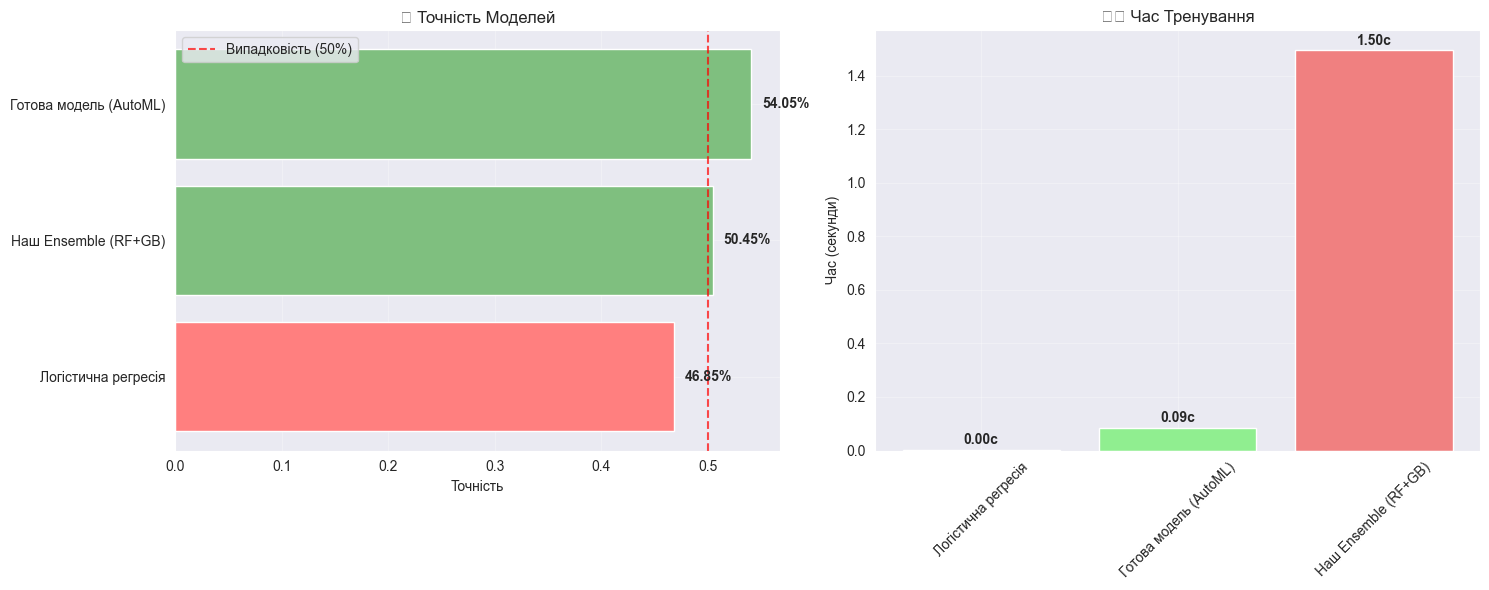

In [6]:
# Візуалізація результатів
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Точність моделей
accuracy_data = results_df['accuracy'].sort_values(ascending=True)
colors = ['#ff7f7f' if acc < 0.5 else '#7fbf7f' if acc < 0.55 else '#7f7fff' for acc in accuracy_data]

bars1 = axes[0].barh(range(len(accuracy_data)), accuracy_data.values, color=colors)
axes[0].set_yticks(range(len(accuracy_data)))
axes[0].set_yticklabels([results_df.loc[idx, 'model'] for idx in accuracy_data.index])
axes[0].set_xlabel('Точність')
axes[0].set_title('🎯 Точність Моделей')
axes[0].axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Випадковість (50%)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Додаємо підписи на барах
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.2%}', ha='left', va='center', fontweight='bold')

# 2. Час тренування
time_data = results_df['training_time'].sort_values(ascending=True)
bars2 = axes[1].bar(range(len(time_data)), time_data.values, 
                   color=['lightblue', 'lightgreen', 'lightcoral'][:len(time_data)])
axes[1].set_xticks(range(len(time_data)))
axes[1].set_xticklabels([results_df.loc[idx, 'model'] for idx in time_data.index], rotation=45)
axes[1].set_ylabel('Час (секунди)')
axes[1].set_title('⏱️ Час Тренування')
axes[1].grid(True, alpha=0.3)

# Додаємо підписи на барах
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                f'{height:.2f}с', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
